In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 15})

In [3]:
# Cluster stuctural properties catalog

# Download the data from the provided URL without saving it locally
url = 'https://people.smp.uq.edu.au/HolgerBaumgardt/globular/combined_table.txt'
response = requests.get(url)
data = response.text

# Extract lines
lines = data.strip().split('\n')

# Extract the header (line 0)
header_line = lines[0]

# Split into words
column_names = header_line.split()

# Get rid of the comment word at the beginning
column_names = column_names[1:]

# Skip lines 1 and 2 and extract the data lines
data_lines = lines[3:]

# Combine the data lines into a single string
data_str = '\n'.join(data_lines)

# Use StringIO to simulate a file in memory
data_io = StringIO(data_str)

# Read the data using read_fwf (fixed-width format)
df = pd.read_fwf(data_io, names=column_names)

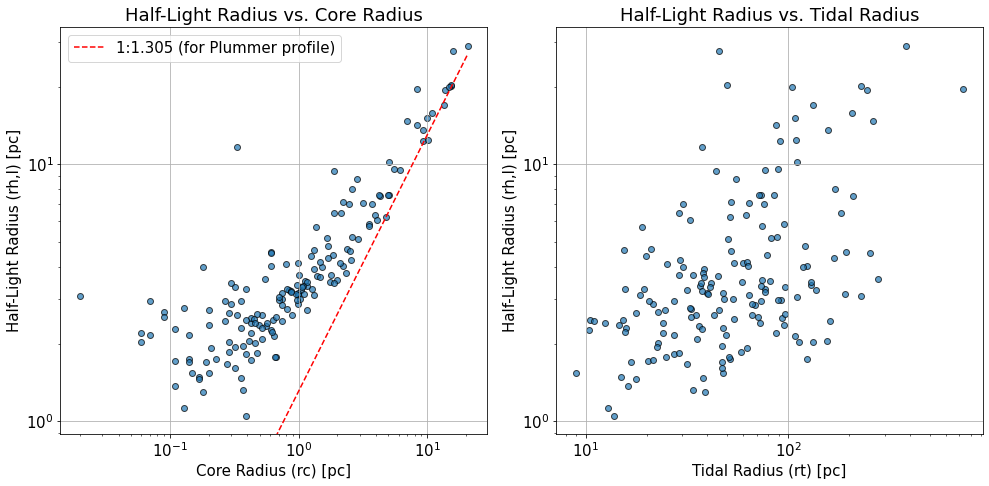

In [4]:
# Create a figure with two subplots (panels)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

# === Panel 1: Half-Light Radius vs. Core Radius === #
ax1.scatter(df['rc'], df['rh,l'], alpha=0.7, edgecolor='k')
ax1.set_xlabel('Core Radius (rc) [pc]')
ax1.set_ylabel('Half-Light Radius (rh,l) [pc]')
ax1.set_title('Half-Light Radius vs. Core Radius')

# Set both axes to log scale
ax1.set_xscale('log')
ax1.set_yscale('log')

# Get the current limits of the plot, based on the scatter data
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Plot a red dashed one-to-one line with a scaling factor
x_vals = np.linspace(df['rc'].min(), df['rc'].max(), 100)
ax1.plot(x_vals, 1.305 * x_vals, 'r--', label='1:1.305 (for Plummer profile)')

# Restore the original plot limits for the first panel
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Add grid and legend
ax1.grid(True)
ax1.legend()

# === Panel 2: Tidal Radius vs. Half-Light Radius === #
ax2.scatter(df['rt'], df['rh,l'], alpha=0.7, edgecolor='k')
ax2.set_ylabel('Half-Light Radius (rh,l) [pc]')
ax2.set_xlabel('Tidal Radius (rt) [pc]')
ax2.set_title('Half-Light Radius vs. Tidal Radius')

# Set both axes to log scale
ax2.set_xscale('log')
ax2.set_yscale('log')

# Add grid
ax2.grid(True)

# Adjust the layout to prevent overlap and make the figure fit nicely
plt.tight_layout()

# Save the figure
plt.savefig("../Figures/globular_clusters_radii.png", format="png", dpi=300, transparent=False, facecolor='white')

# Show the figure
plt.show()
